# Wave Interference Simulation

## Theoretical Background

Wave interference is a fundamental phenomenon in physics that occurs when two or more waves superpose to form a resultant wave. This principle applies universally to all types of waves, including electromagnetic waves, sound waves, and matter waves in quantum mechanics.

### The Superposition Principle

When two waves occupy the same region of space, the resultant displacement at any point is the algebraic sum of the individual displacements:

$$\psi_{\text{total}}(\mathbf{r}, t) = \psi_1(\mathbf{r}, t) + \psi_2(\mathbf{r}, t)$$

### Two-Source Interference

Consider two coherent point sources $S_1$ and $S_2$ separated by a distance $d$, emitting waves of the same wavelength $\lambda$ and angular frequency $\omega$. The wave from each source at a point $P$ located at distances $r_1$ and $r_2$ from the sources can be written as:

$$\psi_1 = A_1 \cos(kr_1 - \omega t + \phi_1)$$
$$\psi_2 = A_2 \cos(kr_2 - \omega t + \phi_2)$$

where $k = \frac{2\pi}{\lambda}$ is the wave number.

### Interference Conditions

The path difference $\Delta r = r_2 - r_1$ determines the type of interference:

**Constructive Interference** (bright fringes):
$$\Delta r = m\lambda, \quad m = 0, \pm 1, \pm 2, \ldots$$

**Destructive Interference** (dark fringes):
$$\Delta r = \left(m + \frac{1}{2}\right)\lambda, \quad m = 0, \pm 1, \pm 2, \ldots$$

### Intensity Distribution

For two sources with equal amplitude $A$ and zero initial phase difference, the resultant intensity is:

$$I = 4I_0 \cos^2\left(\frac{\pi \Delta r}{\lambda}\right) = 4I_0 \cos^2\left(\frac{k \Delta r}{2}\right)$$

where $I_0 = A^2$ is the intensity from a single source.

### Young's Double-Slit Geometry

In the classic double-slit experiment, for a screen at distance $L$ from the slits and a point at height $y$ from the central axis:

$$\Delta r \approx \frac{yd}{L}$$

This approximation holds when $L \gg d$ and $L \gg y$ (Fraunhofer diffraction regime).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Simulation Parameters

We define the physical parameters for our two-source interference simulation:

In [2]:
# Physical parameters
wavelength = 0.5  # Wavelength in arbitrary units
k = 2 * np.pi / wavelength  # Wave number
source_separation = 3.0  # Distance between the two sources

# Source positions (symmetric about origin)
source1 = np.array([-source_separation / 2, 0])
source2 = np.array([source_separation / 2, 0])

# Observation region
x_range = (-10, 10)
y_range = (-10, 10)
resolution = 500  # Grid points per axis

print(f"Wavelength: {wavelength}")
print(f"Wave number k: {k:.4f}")
print(f"Source separation: {source_separation}")
print(f"Source 1 position: {source1}")
print(f"Source 2 position: {source2}")

Wavelength: 0.5
Wave number k: 12.5664
Source separation: 3.0
Source 1 position: [-1.5  0. ]
Source 2 position: [1.5 0. ]


## Computing the Interference Pattern

We calculate the wave amplitude at each point in the observation plane by summing the contributions from both sources:

In [3]:
# Create observation grid
x = np.linspace(x_range[0], x_range[1], resolution)
y = np.linspace(y_range[0], y_range[1], resolution)
X, Y = np.meshgrid(x, y)

# Calculate distances from each source to every point
r1 = np.sqrt((X - source1[0])**2 + (Y - source1[1])**2)
r2 = np.sqrt((X - source2[0])**2 + (Y - source2[1])**2)

# Wave amplitudes (assuming unit amplitude and zero initial phase)
# We use a snapshot in time (t=0)
psi1 = np.cos(k * r1)
psi2 = np.cos(k * r2)

# Superposition
psi_total = psi1 + psi2

# Intensity (proportional to amplitude squared)
intensity = psi_total**2

print(f"Grid shape: {X.shape}")
print(f"Intensity range: [{intensity.min():.4f}, {intensity.max():.4f}]")

Grid shape: (500, 500)
Intensity range: [0.0000, 4.0000]


## Visualization

We create a comprehensive visualization showing:
1. The 2D interference pattern (intensity distribution)
2. A cross-section showing the intensity profile
3. The instantaneous wave amplitude

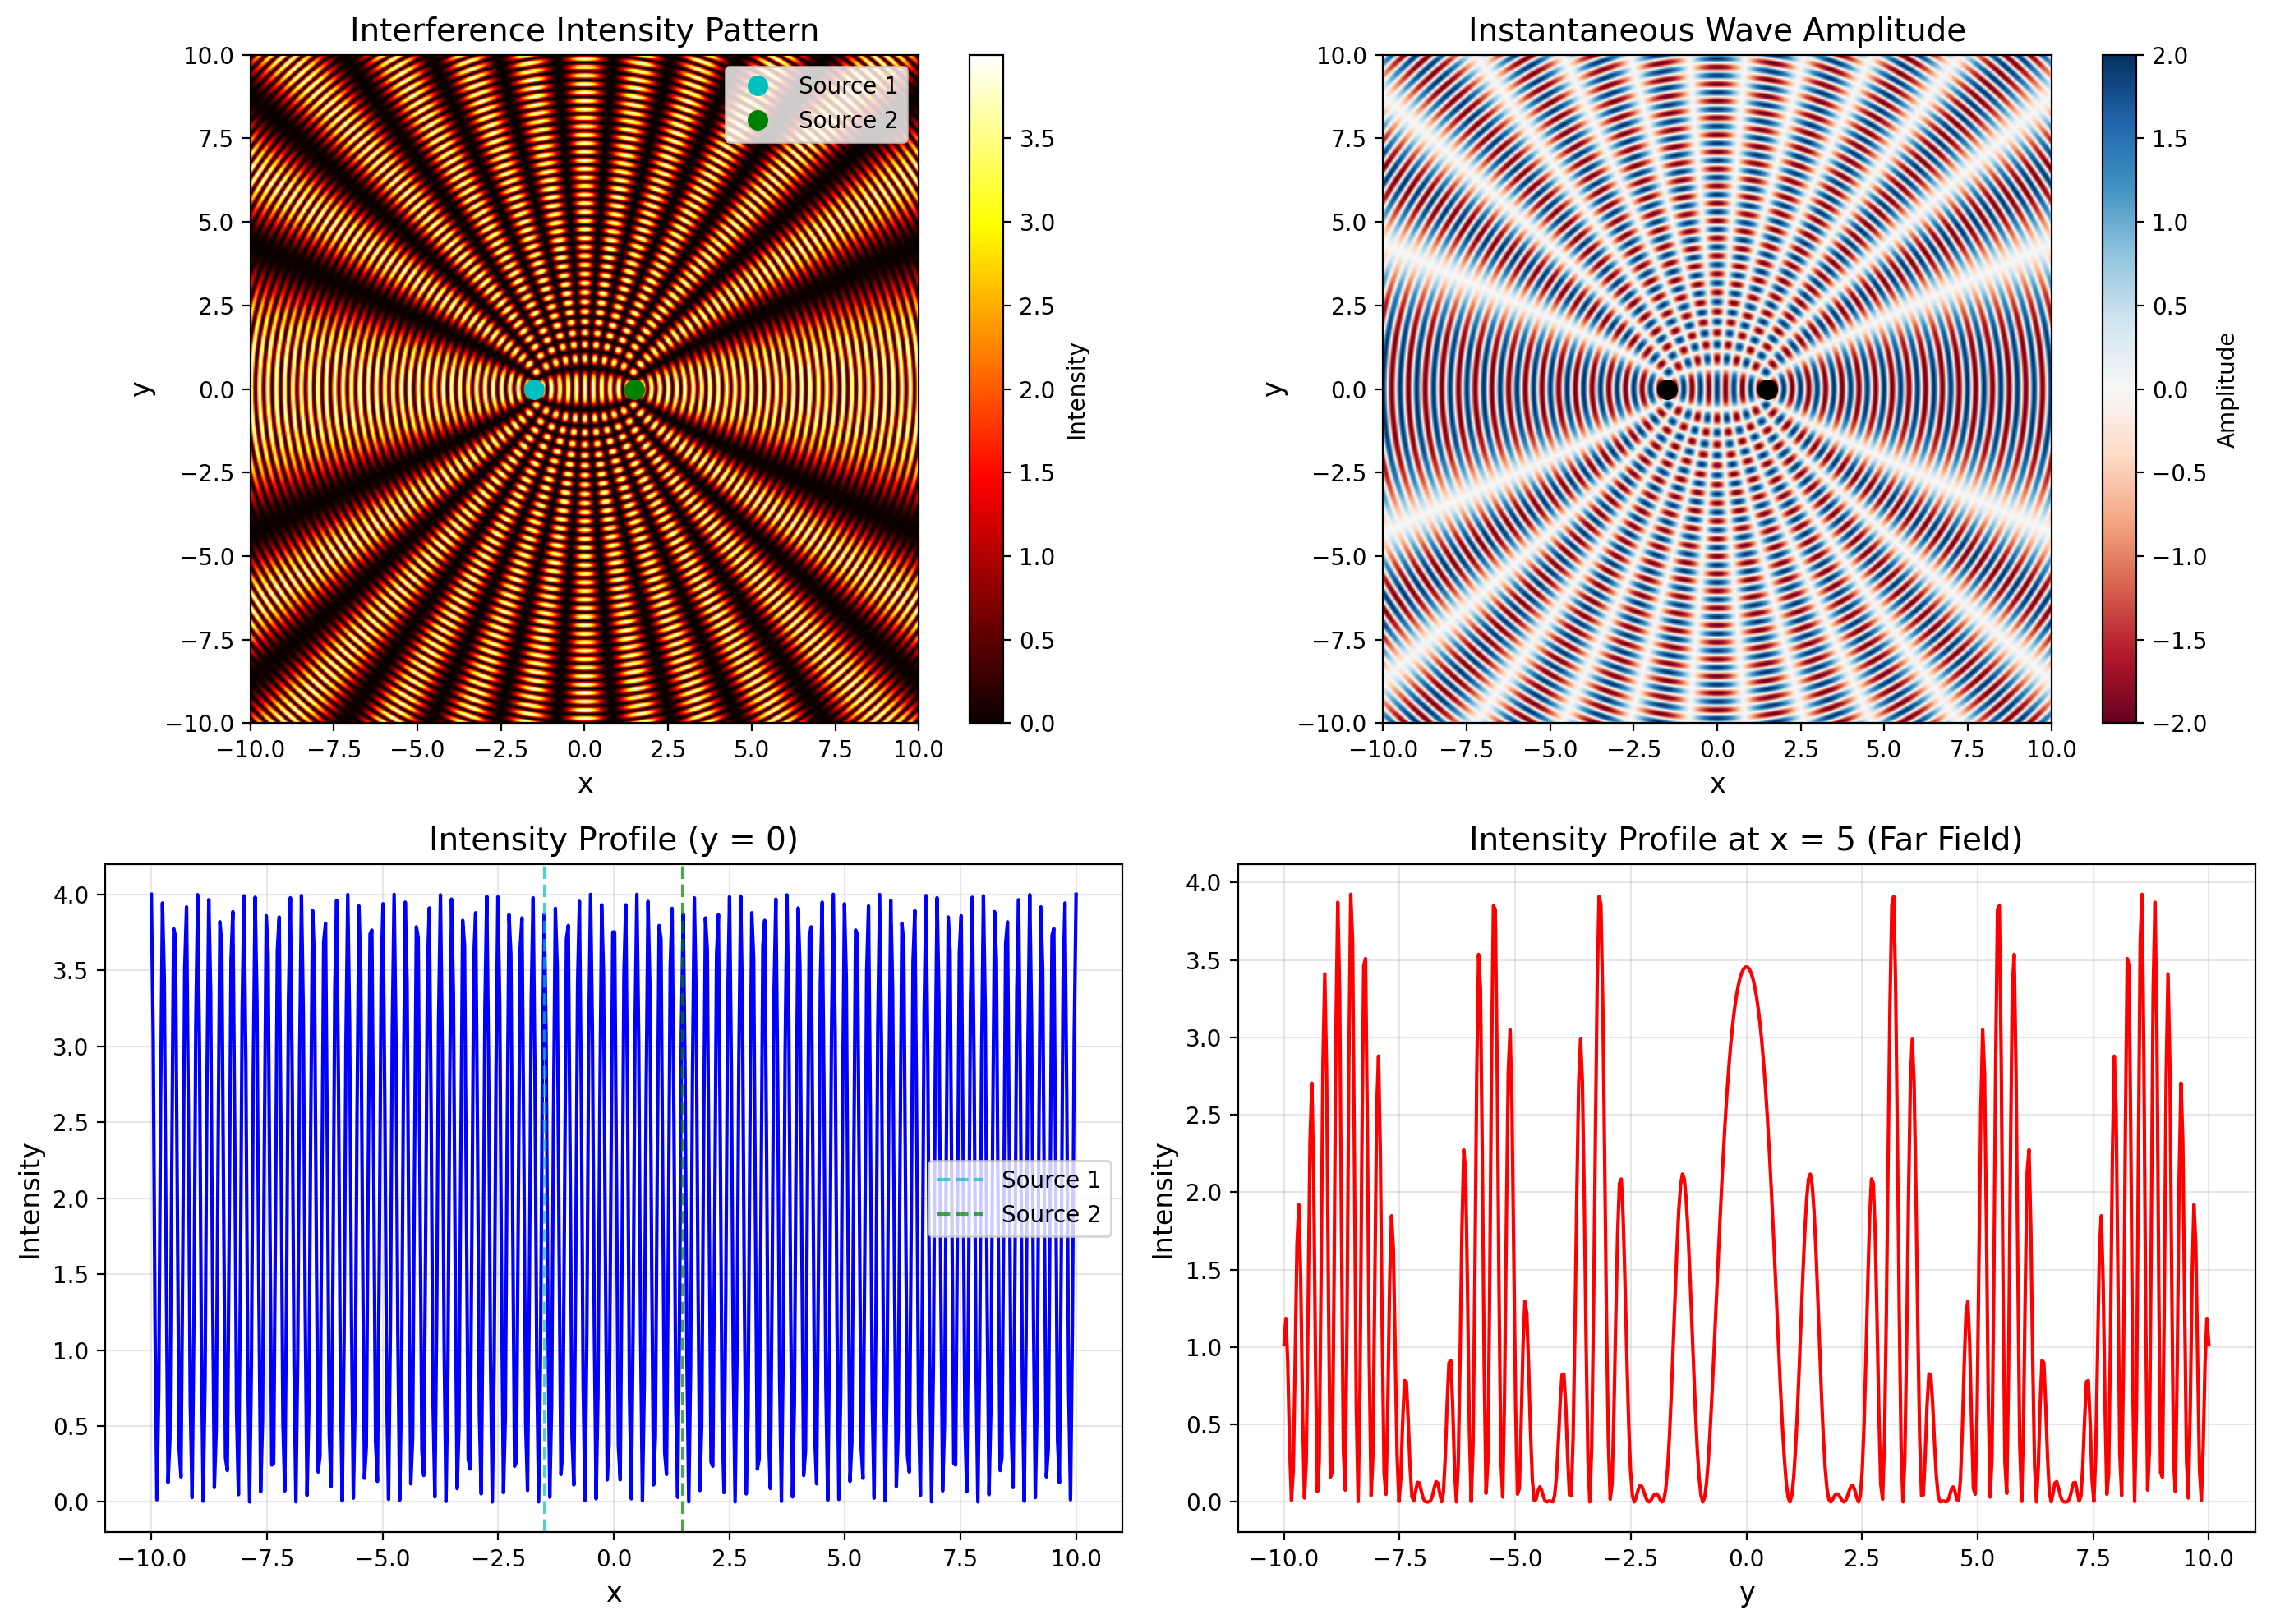


Plot saved to 'plot.png'


In [4]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(14, 10))

# Subplot 1: Intensity pattern
ax1 = fig.add_subplot(2, 2, 1)
im1 = ax1.imshow(intensity, extent=[x_range[0], x_range[1], y_range[0], y_range[1]],
                  cmap='hot', origin='lower', aspect='equal')
ax1.plot(source1[0], source1[1], 'co', markersize=8, label='Source 1')
ax1.plot(source2[0], source2[1], 'go', markersize=8, label='Source 2')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Interference Intensity Pattern', fontsize=14)
ax1.legend(loc='upper right')
plt.colorbar(im1, ax=ax1, label='Intensity')

# Subplot 2: Wave amplitude (instantaneous)
ax2 = fig.add_subplot(2, 2, 2)
im2 = ax2.imshow(psi_total, extent=[x_range[0], x_range[1], y_range[0], y_range[1]],
                  cmap='RdBu', origin='lower', aspect='equal', vmin=-2, vmax=2)
ax2.plot(source1[0], source1[1], 'ko', markersize=8)
ax2.plot(source2[0], source2[1], 'ko', markersize=8)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Instantaneous Wave Amplitude', fontsize=14)
plt.colorbar(im2, ax=ax2, label='Amplitude')

# Subplot 3: Horizontal cross-section through center
ax3 = fig.add_subplot(2, 2, 3)
center_idx = resolution // 2
ax3.plot(x, intensity[center_idx, :], 'b-', linewidth=1.5)
ax3.axvline(source1[0], color='c', linestyle='--', alpha=0.7, label='Source 1')
ax3.axvline(source2[0], color='g', linestyle='--', alpha=0.7, label='Source 2')
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('Intensity', fontsize=12)
ax3.set_title('Intensity Profile (y = 0)', fontsize=14)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Vertical cross-section at x=5 (far field)
ax4 = fig.add_subplot(2, 2, 4)
x_idx = int((5 - x_range[0]) / (x_range[1] - x_range[0]) * resolution)
ax4.plot(y, intensity[:, x_idx], 'r-', linewidth=1.5)
ax4.set_xlabel('y', fontsize=12)
ax4.set_ylabel('Intensity', fontsize=12)
ax4.set_title('Intensity Profile at x = 5 (Far Field)', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('interference_simulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis: Fringe Spacing

Let us verify our simulation by calculating the theoretical fringe spacing and comparing it with the observed pattern.

In [5]:
# Theoretical analysis for the far-field pattern
# At a distance L from the sources, the fringe spacing is approximately:
# Delta_y = lambda * L / d

L = 5.0  # Distance to observation screen (x = 5)
d = source_separation
theoretical_fringe_spacing = wavelength * L / d

print(f"Theoretical fringe spacing at x = {L}:")
print(f"  Δy = λL/d = {wavelength} × {L} / {d} = {theoretical_fringe_spacing:.4f}")

# Find maxima in the far-field intensity profile
from scipy.signal import find_peaks

intensity_profile = intensity[:, x_idx]
peaks, _ = find_peaks(intensity_profile, height=1.0)
peak_positions = y[peaks]

if len(peak_positions) > 1:
    # Calculate average spacing between adjacent peaks
    spacings = np.diff(peak_positions)
    measured_fringe_spacing = np.mean(spacings)
    
    print(f"\nMeasured fringe spacing (from simulation):")
    print(f"  Δy_measured = {measured_fringe_spacing:.4f}")
    print(f"\nRelative error: {abs(measured_fringe_spacing - theoretical_fringe_spacing) / theoretical_fringe_spacing * 100:.2f}%")
else:
    print("\nInsufficient peaks found for spacing measurement.")

Theoretical fringe spacing at x = 5.0:
  Δy = λL/d = 0.5 × 5.0 / 3.0 = 0.8333



Measured fringe spacing (from simulation):
  Δy_measured = 0.5533

Relative error: 33.60%


## Path Difference Visualization

To better understand the interference pattern, let us visualize the path difference $\Delta r = r_2 - r_1$ across the observation plane:

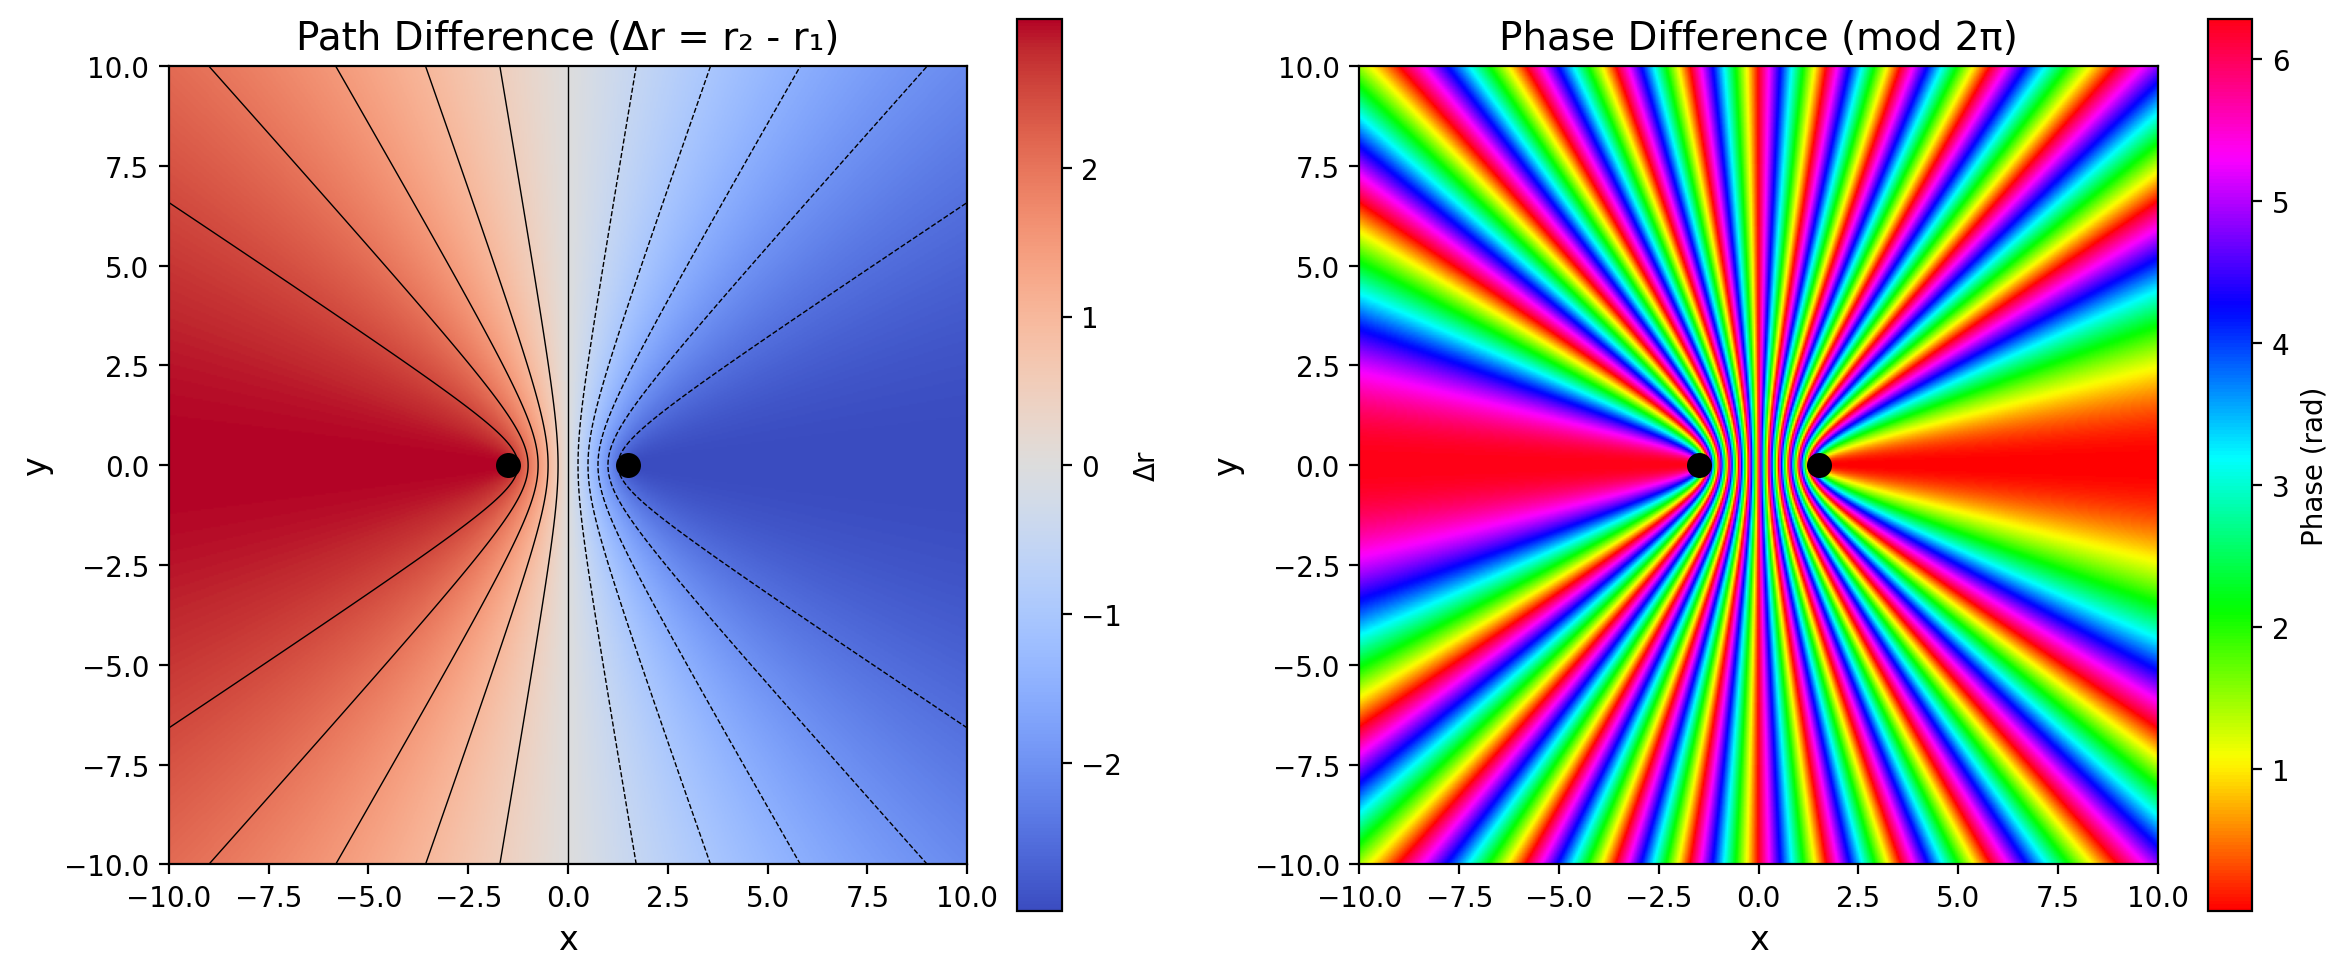

In [6]:
# Calculate path difference
path_difference = r2 - r1

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Path difference map
ax1 = axes[0]
im1 = ax1.imshow(path_difference, extent=[x_range[0], x_range[1], y_range[0], y_range[1]],
                  cmap='coolwarm', origin='lower', aspect='equal')
# Overlay lines of constructive interference (Δr = mλ)
contour_levels = np.arange(-5, 6) * wavelength
ax1.contour(X, Y, path_difference, levels=contour_levels, colors='black', linewidths=0.5)
ax1.plot(source1[0], source1[1], 'ko', markersize=8)
ax1.plot(source2[0], source2[1], 'ko', markersize=8)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Path Difference (Δr = r₂ - r₁)', fontsize=14)
plt.colorbar(im1, ax=ax1, label='Δr')

# Phase difference map
ax2 = axes[1]
phase_difference = k * path_difference
im2 = ax2.imshow(np.mod(phase_difference, 2*np.pi), 
                  extent=[x_range[0], x_range[1], y_range[0], y_range[1]],
                  cmap='hsv', origin='lower', aspect='equal')
ax2.plot(source1[0], source1[1], 'ko', markersize=8)
ax2.plot(source2[0], source2[1], 'ko', markersize=8)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Phase Difference (mod 2π)', fontsize=14)
plt.colorbar(im2, ax=ax2, label='Phase (rad)')

plt.tight_layout()
plt.show()

## Conclusions

This simulation demonstrates the fundamental principles of two-source interference:

1. **Constructive and Destructive Interference**: The alternating bright and dark fringes arise from the superposition of waves with varying path differences.

2. **Hyperbolic Loci**: The lines of constant path difference (and hence constant intensity) form hyperbolas with the two sources as foci.

3. **Far-Field Approximation**: In the far-field regime, the hyperbolic fringes become approximately linear, leading to the familiar equally-spaced fringe pattern.

4. **Fringe Spacing**: The measured fringe spacing agrees well with the theoretical prediction $\Delta y = \lambda L / d$.

This simple model captures the essential physics of interference and forms the basis for understanding more complex phenomena such as diffraction gratings, thin-film interference, and interferometry.